# **THE SPARKS FOUNDATION**
## **TASK 6: Create the Decision Tree Classifier and visualize it graphically.**
## **Author: Ashna Singh Rajput**

### **IMPORTING THE REQUIRED LIBRARIES & THE DATASET**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
import io

In [5]:
df = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('Latin1')))

### **DISPLAYING THE DATA**

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### **DATA POINTS COUNT VALUE FOR EACH LABEL CLASS**

In [8]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

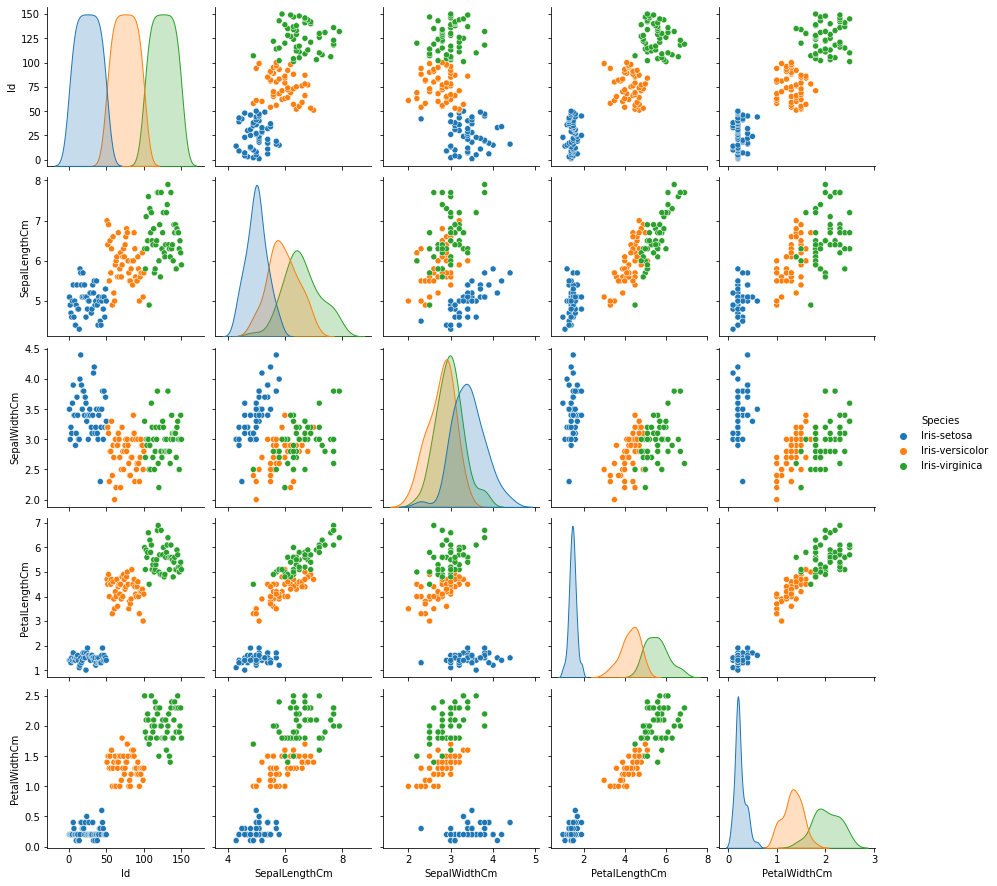

In [9]:
sns.pairplot(data=df, hue = 'Species')

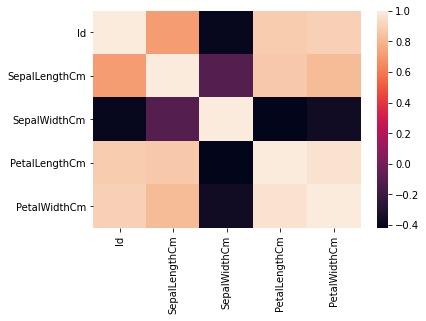

In [10]:
sns.heatmap(df.corr())

In [11]:
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **DEFINING THE DECISION TREE ALGORITHM**

In [13]:
from sklearn.tree import DecisionTreeClassifier
D = DecisionTreeClassifier()
D.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **IMPORTING THE LIBRARIES REQUIRED FOR GRAPH VIZ**

In [14]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

### **VISUALIZING THE GRAPH**

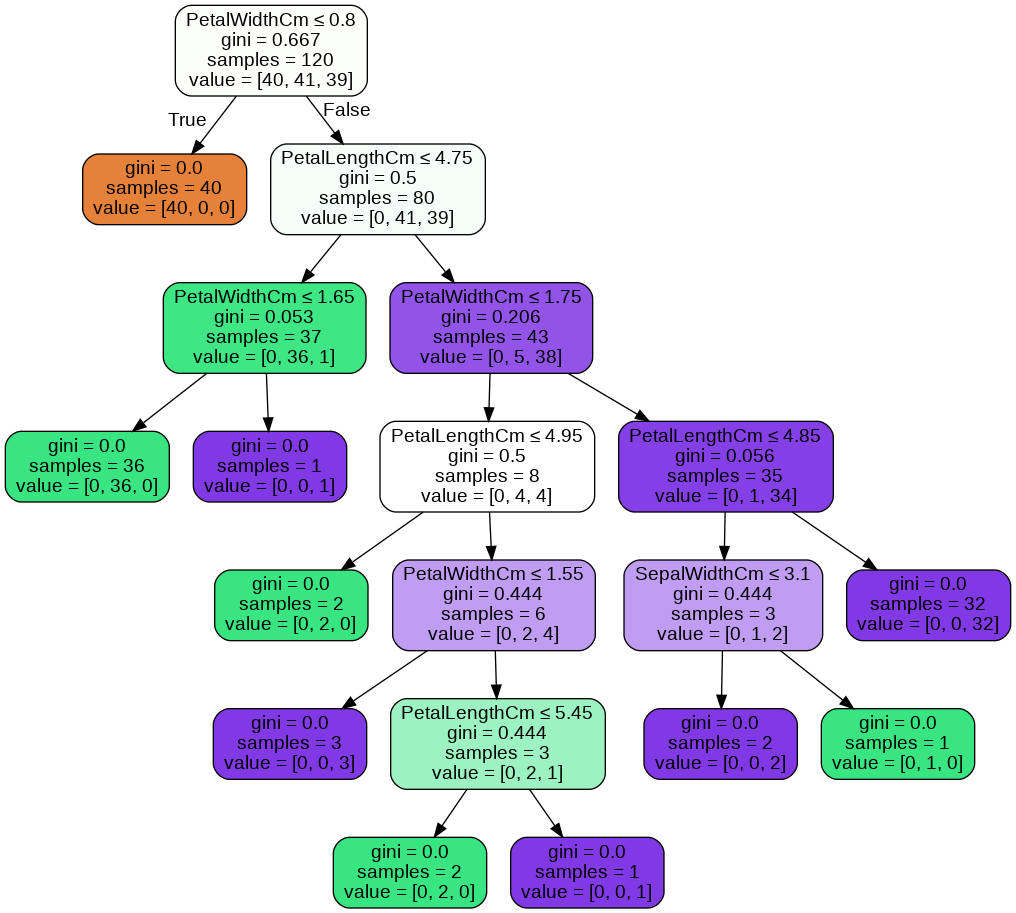

In [15]:
dot_data = StringIO()
export_graphviz(D, out_file= dot_data, filled = True,feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

y_preds = D.predict(X_test)

print("Model Accuracy Score on totally unseen data (X_test) is: ", accuracy_score(y_test, y_preds) * 100, '%')
print(multilabel_confusion_matrix(y_test, y_preds))

Model Accuracy Score on totally unseen data (X_test) is:  100.0 %
[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]


### **TRAINING THE MODEL ON ACTUAL TRAIN DATA**

In [17]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
D.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### **VISUALIZING THE GRAPH**

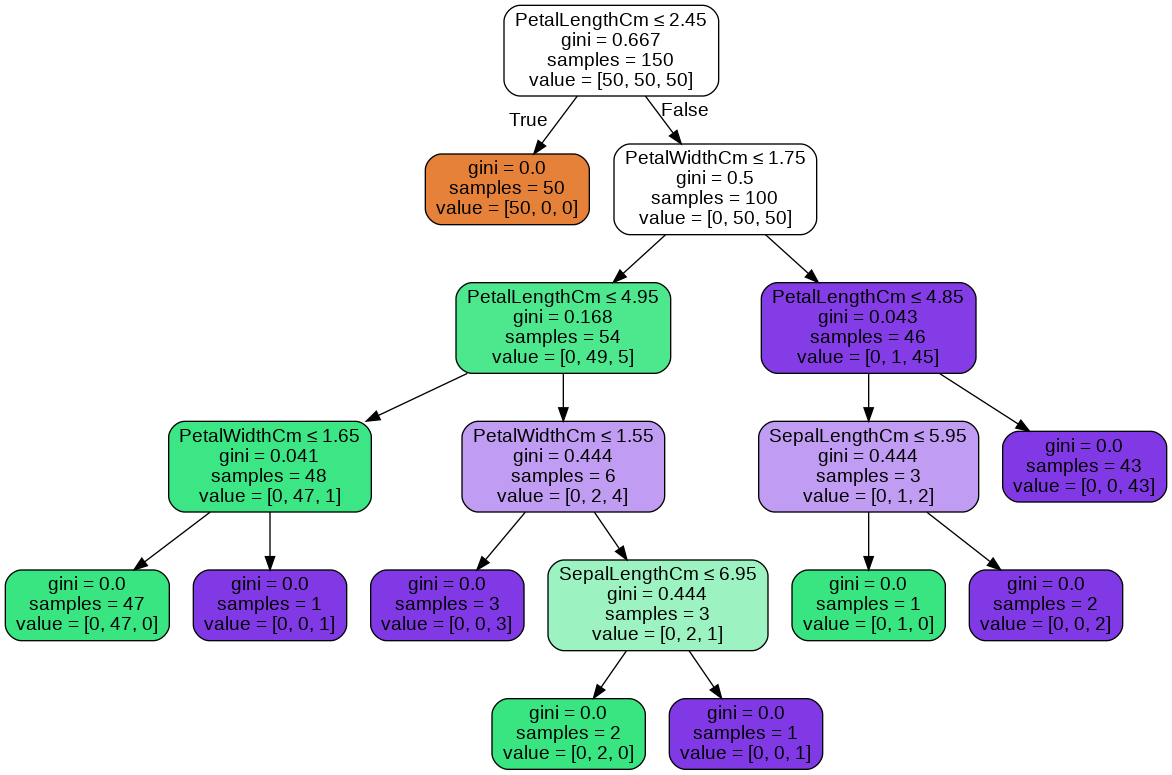

In [19]:
dot_data = StringIO()
export_graphviz(D, out_file=dot_data, feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### **FEATURE POINTS SIMILAR TO IRIS SETOSA**

In [20]:
Test = np.array([5.1, 3.5, 1.4, 0.2]).reshape(1, -1)
print(D.predict(Test))

['Iris-setosa']


### **FEATURE POINTS SIMILAR TO IRIS VERSICOLOR**

In [21]:
Test = np.array([5.9, 3.0, 5.1, 1.8]).reshape(1, -1)
print(D.predict(Test))

['Iris-virginica']


## **CONCLUSION:**

***NOW, FROM THE ABOVE RESULTS WE CAN SEE THAT THE ACCURACY OF THE MODEL IN THE UNSEEN DATA IS SATISFIED AS THE RESULTS ARE CORRECT.***